In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
import hvplot.pandas
import plotly.express as px
from pathlib import Path

In [2]:
# Import dotenv package for setting environment variables 
from dotenv import load_dotenv

In [3]:
%matplotlib inline

In [4]:
# Set environment variables from the .env in the local environment
load_dotenv()

True

In [30]:
# Retrieve API key and store as Python variable
api_key = os.getenv("YELP_KEY")

# Define endpoint
Endpoint = 'https://api.yelp.com/v3/businesses/search?latitude=47.62128514958681&longitude=-122.1943334939272&price=1,2,3,4&sort_by=review_count&limit=2'

In [23]:
tsla = pd.read_csv(Path("group_4/004.01-proj-group4/M8_Challenge_Submission/Data/Tesla_Superchargers/tesla.csv"))
#tesla head
tsla.head()

,location,Lat,Lon,location.zip_code
0,"11010 NE 8th St Bellevue, Washington 98004",47.621285,-122.194333,98004
1,"200 110th Ave Bellevue, WA 98004",47.615551,-122.194319,98004
2,"300 112th Ave SE Bellevue, WA 98004",47.607840,-122.189593,98004
3,"208 106th Pl NE Bellevue, WA 98004",47.611745,-122.199764,98004
4,"223 Bellevue Square Space 104 Bellevue, WA 98004",47.616682,-122.203223,98004


11010 NE 8th St Bellevue, Washington 98004 47.62128515 -122.1943335
200 110th Ave Bellevue, WA 98004 47.615551 -122.194319
300 112th Ave SE Bellevue, WA 98004 47.60784 -122.18959299999999
208 106th Pl NE Bellevue, WA 98004 47.61174506 -122.1997637
223 Bellevue Square Space 104 Bellevue, WA 98004 47.61668175 -122.20322279999999
14408 NE 20th Street Bellevue, WA 98007 47.63233357 -122.14817509999999


In [31]:
#Define header
Headers = {'Authorization': 'bearer %s' %api_key}

In [40]:
all_yelps = {}
for x in tsla.iterrows():
    print(x[1]["location"], x[1]["Lat"], x[1]["Lon"])
    Endpoint2 = f'https://api.yelp.com/v3/businesses/search?latitude={x[1]["Lat"]}&longitude={x[1]["Lon"]}&price=1,2,3,4&sort_by=review_count&limit=50'
    response = requests.get(url = Endpoint2, headers = Headers)
    location_one = response.json()
    all_yelps[x[1]["location"]] = pd.DataFrame(location_one['businesses'])
    all_yelps[x[1]["location"]]["TeslaLocation"] = x[1]["location"]
    
#     print(x[1])

11010 NE 8th St Bellevue, Washington 98004 47.62128515 -122.1943335
200 110th Ave Bellevue, WA 98004 47.615551 -122.194319
300 112th Ave SE Bellevue, WA 98004 47.60784 -122.18959299999999
208 106th Pl NE Bellevue, WA 98004 47.61174506 -122.1997637
223 Bellevue Square Space 104 Bellevue, WA 98004 47.61668175 -122.20322279999999
14408 NE 20th Street Bellevue, WA 98007 47.63233357 -122.14817509999999


In [42]:
df = pd.concat(all_yelps)

In [43]:
df.to_csv("group_4/004.01-proj-group4/M8_Challenge_Submission/Data/Tesla_Superchargers/teslafulldata.csv")

In [39]:
pd.DataFrame(all_yelps["11010 NE 8th St Bellevue, Washington 98004"])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,ywXCcLbaf6yDfIm84QxZPQ,din-tai-fung-bellevue-4,Din Tai Fung,https://s3-media2.fl.yelpcdn.com/bphoto/c6Xc0D...,False,https://www.yelp.com/biz/din-tai-fung-bellevue...,3945,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,"{'latitude': 47.617195, 'longitude': -122.20059}","[delivery, restaurant_reservation]",$$,"{'address1': '700 Bellevue Way NE', 'address2'...",+14256981095,(425) 698-1095,653.256756
1,vTeHclzyrWygJybfv0h5OA,facing-east-bellevue,Facing East,https://s3-media2.fl.yelpcdn.com/bphoto/e2iC80...,False,https://www.yelp.com/biz/facing-east-bellevue?...,1893,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 47.619749, 'longitude': -122.202793}","[delivery, pickup]",$$,"{'address1': '1075 Bellevue Way NE', 'address2...",+14256882986,(425) 688-2986,656.641148
2,dO7WB-1iPb6CFc_f7t90pA,john-howie-steak-restaurant-bellevue-2,John Howie Steak Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/c8qOjd...,False,https://www.yelp.com/biz/john-howie-steak-rest...,1350,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.0,"{'latitude': 47.616897, 'longitude': -122.191211}",[delivery],$$$$,"{'address1': '11111 NE 8th St', 'address2': 'S...",+14254400880,(425) 440-0880,541.163462
3,ybBJtVElvdr7tWub4sEFFw,maggianos-little-italy-bellevue,Maggiano's Little Italy,https://s3-media3.fl.yelpcdn.com/bphoto/QzkS2m...,False,https://www.yelp.com/biz/maggianos-little-ital...,1154,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.5,"{'latitude': 47.6172, 'longitude': -122.20061}",[pickup],$$,"{'address1': '10455 NE 8th St', 'address2': ''...",+14255196476,(425) 519-6476,663.949758
4,cn9ox-BRc2D45oWmp1egdg,mediterranean-kitchen-bellevue,Mediterranean Kitchen,https://s3-media4.fl.yelpcdn.com/bphoto/37KgPt...,False,https://www.yelp.com/biz/mediterranean-kitchen...,1029,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.0,"{'latitude': 47.6113559604462, 'longitude': -1...","[delivery, pickup]",$$,"{'address1': '103 Bellevue Way NE', 'address2'...",+14254629422,(425) 462-9422,1236.526895
5,gHHDCn4g4KCKFbaMxjxS8g,daniels-broiler-bellevue-7,Daniel's Broiler,https://s3-media4.fl.yelpcdn.com/bphoto/yRy7cv...,False,https://www.yelp.com/biz/daniels-broiler-belle...,994,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",3.5,"{'latitude': 47.617784, 'longitude': -122.200176}","[delivery, pickup]",$$$,"{'address1': '10500 NE 8th St', 'address2': 'F...",+14254624662,(425) 462-4662,585.934386
6,3xZfgDIz--SSeVfmEXv6MA,sugar-factory-bellevue-2,Sugar Factory,https://s3-media3.fl.yelpcdn.com/bphoto/h_JFnp...,False,https://www.yelp.com/biz/sugar-factory-bellevu...,965,"[{'alias': 'candy', 'title': 'Candy Stores'}, ...",3.0,"{'latitude': 47.61693, 'longitude': -122.19188}",[delivery],$$$,"{'address1': '11111 NE 8th St', 'address2': 'S...",+14254540313,(425) 454-0313,551.589036
7,6wrvQqQwkeQnokD7kPX-rQ,earls-kitchen-bar-bellevue,Earls Kitchen + Bar,https://s3-media2.fl.yelpcdn.com/bphoto/mCspmL...,False,https://www.yelp.com/biz/earls-kitchen-bar-bel...,963,"[{'alias': 'newamerican', 'title': 'American (...",3.0,"{'latitude': 47.616346, 'longitude': -122.201261}","[delivery, pickup]",$$,"{'address1': '700 Bellevue Way NE', 'address2'...",+14254523275,(425) 452-3275,755.796698
8,NuPKl9HvpYSr1g5hYBAQKA,seastar-restaurant-and-raw-bar-bellevue,Seastar Restaurant & Raw Bar,https://s3-media2.fl.yelpcdn.com/bphoto/dbT_4v...,False,https://www.yelp.com/biz/seastar-restaurant-an...,950,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 47.612268, 'longitude': -122.196844}",[delivery],$$$,"{'address1': '205 108th Ave NE', 'address2': '...",+14254560010,(425) 456-0010,1014.246103
9,PzFJNls55DcBsWJOU2O0BQ,joey-bellevue-bellevue,JOEY Bellevue,https://s3-media3.fl.yelpcdn.com/bphoto/fjonim...,False,https://www.yelp.com/biz/joey-bellevue-bellevu...,904,"[{'alias': 'newamerican', 'title': 'Ameri

In [44]:
# Load the .env file into the notebook
load_dotenv()

# Read MAPBOX_API_KEY
mapbox_api_access_token = os.getenv("PUBLIC_MAPBOX_API_KEY")

# Confirm the availability of your Mapbox API access token by checking its type
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")

# Set your Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

mapbox_api_access_token 

'pk.eyJ1IjoiYW1leHZhc3F1ZXoxIiwiYSI6ImNrZzhxYnVwdzA0OXAydHBsMm1yYng5MTgifQ.oR8b0_CfhZn6sLk373dd7A'

In [45]:
#import path
from pathlib import Path
#location one csv df 
business_df = pd.read_csv(Path("group_4/004.01-proj-group4/M8_Challenge_Submission/Data/Tesla_Superchargers/teslafulldata.csv"))
#tesla head
business_df.head()

,Unnamed: 0,Unnamed: 1,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,TeslaLocation
0,"11010 NE 8th St Bellevue, Washington 98004",0,ywXCcLbaf6yDfIm84QxZPQ,din-tai-fung-bellevue-4,Din Tai Fung,https://s3-media2.fl.yelpcdn.com/bphoto/c6Xc0D...,False,https://www.yelp.com/biz/din-tai-fung-bellevue...,3945,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,"{'latitude': 47.617195, 'longitude': -122.20059}","['delivery', 'restaurant_reservation']",$$,"{'address1': '700 Bellevue Way NE', 'address2'...",14256981095,(425) 698-1095,653.256756,"11010 NE 8th St Bellevue, Washington 98004"
1,"11010 NE 8th St Bellevue, Washington 98004",1,vTeHclzyrWygJybfv0h5OA,facing-east-bellevue,Facing East,https://s3-media2.fl.yelpcdn.com/bphoto/e2iC80...,False,https://www.yelp.com/biz/facing-east-bellevue?...,1893,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 47.619749, 'longitude': -122.202793}","['delivery', 'pickup']",$$,"{'address1': '1075 Bellevue Way NE', 'address2...",14256882986,(425) 688-2986,656.641148,"11010 NE 8th St Bellevue, Washington 98004"
2,"11010 NE 8th St Bellevue, Washington 98004",2,dO7WB-1iPb6CFc_f7t90pA,john-howie-steak-restaurant-bellevue-2,John Howie Steak Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/c8qOjd...,False,https://www.yelp.com/biz/john-howie-steak-rest...,1350,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.0,"{'latitude': 47.616897, 'longitude': -122.191211}",['delivery'],$$$$,"{'address1': '11111 NE 8th St', 'address2': 'S...",14254400880,(425) 440-0880,541.163462,"11010 NE 8th St Bellevue, Washington 98004"
3,"11010 NE 8th St Bellevue, Washington 98004",3,ybBJtVElvdr7tWub4sEFFw,maggianos-little-italy-bellevue,Maggiano's Little Italy,https://s3-media3.fl.yelpcdn.com/bphoto/QzkS2m...,False,https://www.yelp.com/biz/maggianos-little-ital...,1154,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.5,"{'latitude': 47.6172, 'longitude': -122.20061}",['pickup'],$$,"{'address1': '10455 NE 8th St', 'address2': ''...",14255196476,(425) 519-6476,663.949758,"11010 NE 8th St Bellevue, Washington 98004"
4,"11010 NE 8th St Bellevue, Washington 98004",4,cn9ox-BRc2D45oWmp1egdg,mediterranean-kitchen-bellevue,Mediterranean Kitchen,https://s3-media4.fl.yelpcdn.com/bphoto/37KgPt...,False,https://www.yelp.com/biz/mediterranean-kitchen...,1029,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.0,"{'latitude': 47.6113559604462, 'longitude': -1...","['delivery', 'pickup']",$$,"{'address1': '103 Bellevue Way NE', 'address2'...",14254629422,(425) 462-9422,1236.526895,"11010 NE 8th St Bellevue, Washington 98004"


In [82]:
business_df = pd.DataFrame(business_df)
cols = [2,6,8,9,16]
business_df = df[df.columns[cols]]

business_df

name  \
11010 NE 8th St Bellevue, Washington 98004 0                  Din Tai Fung   
                                           1                   Facing East   
                                           2   John Howie Steak Restaurant   
                                           3       Maggiano's Little Italy   
                                           4         Mediterranean Kitchen   
...                                                                    ...   
14408 NE 20th Street Bellevue, WA 98007    45                   MonGa Cafe   
                                           46        Bellevue Thai Kitchen   
                                           47                   Udupi Cafe   
                                           48      Teapot Vegetarian House   
                                           49                     Wingstop   

                                               review_count  rating  \
11010 NE 8th St Bellevue, Washington 98004 0           3945     4.0   
                                           1           1893     4.0   
                                           2           1350     4.0   
                                           3           1154     3.5   
                                           4           1029     4.0   
...                                                     ...     ...   
14408 NE 20th Street Bellevue, WA 98007    45           266     3.5   
                                           46           263     3.5   
                                           47           251     3.0   
                                           48           249     3.5   
                                           49           246     3.0   

                                                                                     coordinates  \
11010 NE 8th St Bellevue, Washington 98004 0    {'latitude': 47.617195, 'longitude': -122.20059}   
                                           1   {'latitude': 47.619749, 'longitude': -122.202793}   
                                           2   {'latitude': 47.616897, 'longitude': -122.191211}   
                                           3      {'latitude': 47.6172, 'longitude': -122.20061}   
                                           4   {'latitude': 47.6113559604462, 'longitude': -1...   
...                                                                                          ...   
14408 NE 20th Street Bellevue, WA 98007    45    {'latitude': 47.62676, 'longitude': -122.14458}   
                                           46  {'latitude': 47.627219091839, 'longitude': -12...   
                                           47     {'latitude': 47.6311, 'longitude': -122.14497}   
                                           48    {'latitude': 47.63199, 'longitude': -122.13618}   
                                           49  {'latitude': 47.609676361084, 'longitude': -12...   

                                                                            TeslaLocation  
11010 NE 8th St Bellevue, Washington 98004 0   11010 NE 8th St Bellevue, Washington 98004  
                                           1   11010 NE 8th St Bellevue, Washington 98004  
                                           2   11010 NE 8th St Bellevue, Washington 98004  
                                           3   11010 NE 8th St Bellevue, Washington 98004  
                                           4   11010 NE 8th St Bellevue, Washington 98004  
...                                                                                   ...  
14408 NE 20th Street Bellevue, WA 98007    45     14408 NE 20th Street Bellevue, WA 98007  
                                           46     14408 NE 20th Street Bellevue, WA 98007  
                                           47     14408 NE 20th Street Bellevue, WA 98007  
                                           48     14408 NE 20th Street Bellevue, WA 98007  
                                           49     14408 NE 20th Str

In [127]:
print(business_df['coordinates'].dtype)


business_df['lat'] = business_df['coordinates'].apply(lambda x: x['latitude'])
#print(business_df['latitude'])

business_df['lon'] = business_df['coordinates'].apply(lambda x: x['longitude'])
#print(business_df['longitude'])
#business_df.values({'1'},{'2'})

#business_df.coordinates[0 {'1'}, {'2'}]
business_df

object


/Users/ale/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/ale/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name  \
11010 NE 8th St Bellevue, Washington 98004 0                  Din Tai Fung   
                                           1                   Facing East   
                                           2   John Howie Steak Restaurant   
                                           3       Maggiano's Little Italy   
                                           4         Mediterranean Kitchen   
...                                                                    ...   
14408 NE 20th Street Bellevue, WA 98007    45                   MonGa Cafe   
                                           46        Bellevue Thai Kitchen   
                                           47                   Udupi Cafe   
                                           48      Teapot Vegetarian House   
                                           49                     Wingstop   

                                               review_count  rating  \
11010 NE 8th St Bellevue, Washington 98004 0           3945     4.0   
                                           1           1893     4.0   
                                           2           1350     4.0   
                                           3           1154     3.5   
                                           4           1029     4.0   
...                                                     ...     ...   
14408 NE 20th Street Bellevue, WA 98007    45           266     3.5   
                                           46           263     3.5   
                                           47           251     3.0   
                                           48           249     3.5   
                                           49           246     3.0   

                                                                                     coordinates  \
11010 NE 8th St Bellevue, Washington 98004 0    {'latitude': 47.617195, 'longitude': -122.20059}   
                                           1   {'latitude': 47.619749, 'longitude': -122.202793}   
                                           2   {'latitude': 47.616897, 'longitude': -122.191211}   
                                           3      {'latitude': 47.6172, 'longitude': -122.20061}   
                                           4   {'latitude': 47.6113559604462, 'longitude': -1...   
...                                                                                          ...   
14408 NE 20th Street Bellevue, WA 98007    45    {'latitude': 47.62676, 'longitude': -122.14458}   
                                           46  {'latitude': 47.627219091839, 'longitude': -12...   
                                           47     {'latitude': 47.6311, 'longitude': -122.14497}   
                                           48    {'latitude': 47.63199, 'longitude': -122.13618}   
                                           49  {'latitude': 47.609676361084, 'longitude': -12...   

                                                                            TeslaLocation  \
11010 NE 8th St Bellevue, Washington 98004 0   11010 NE 8th St Bellevue, Washington 98004   
                                           1   11010 NE 8th St Bellevue, Washington 98004   
                                           2   11010 NE 8th St Bellevue, Washington 98004   
                                           3   11010 NE 8th St Bellevue, Washington 98004   
                                           4   11010 NE 8th St Bellevue, Washington 98004   
...                                                                                   ...   
14408 NE 20th Street Bellevue, WA 98007    45     14408 NE 20th Street Bellevue, WA 98007   
                                           46     14408 NE 20th Street Bellevue, WA 98007   
                                           47     14408 NE 20th Street Bellevue, WA 98007   
                                           48     14408 NE 20th Street Bellevue, WA 98007   
                                           49     14408 

In [131]:
business_df.drop(columns=['latitude','longitude'], inplace=True)
business_df

/Users/ale/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name  \
11010 NE 8th St Bellevue, Washington 98004 0                  Din Tai Fung   
                                           1                   Facing East   
                                           2   John Howie Steak Restaurant   
                                           3       Maggiano's Little Italy   
                                           4         Mediterranean Kitchen   
...                                                                    ...   
14408 NE 20th Street Bellevue, WA 98007    45                   MonGa Cafe   
                                           46        Bellevue Thai Kitchen   
                                           47                   Udupi Cafe   
                                           48      Teapot Vegetarian House   
                                           49                     Wingstop   

                                               review_count  rating  \
11010 NE 8th St Bellevue, Washington 98004 0           3945     4.0   
                                           1           1893     4.0   
                                           2           1350     4.0   
                                           3           1154     3.5   
                                           4           1029     4.0   
...                                                     ...     ...   
14408 NE 20th Street Bellevue, WA 98007    45           266     3.5   
                                           46           263     3.5   
                                           47           251     3.0   
                                           48           249     3.5   
                                           49           246     3.0   

                                                                                     coordinates  \
11010 NE 8th St Bellevue, Washington 98004 0    {'latitude': 47.617195, 'longitude': -122.20059}   
                                           1   {'latitude': 47.619749, 'longitude': -122.202793}   
                                           2   {'latitude': 47.616897, 'longitude': -122.191211}   
                                           3      {'latitude': 47.6172, 'longitude': -122.20061}   
                                           4   {'latitude': 47.6113559604462, 'longitude': -1...   
...                                                                                          ...   
14408 NE 20th Street Bellevue, WA 98007    45    {'latitude': 47.62676, 'longitude': -122.14458}   
                                           46  {'latitude': 47.627219091839, 'longitude': -12...   
                                           47     {'latitude': 47.6311, 'longitude': -122.14497}   
                                           48    {'latitude': 47.63199, 'longitude': -122.13618}   
                                           49  {'latitude': 47.609676361084, 'longitude': -12...   

                                                                            TeslaLocation  \
11010 NE 8th St Bellevue, Washington 98004 0   11010 NE 8th St Bellevue, Washington 98004   
                                           1   11010 NE 8th St Bellevue, Washington 98004   
                                           2   11010 NE 8th St Bellevue, Washington 98004   
                                           3   11010 NE 8th St Bellevue, Washington 98004   
                                           4   11010 NE 8th St Bellevue, Washington 98004   
...                                                                                   ...   
14408 NE 20th Street Bellevue, WA 98007    45     14408 NE 20th Street Bellevue, WA 98007   
                                           46     14408 NE 20th Street Bellevue, WA 98007   
                                           47     14408 NE 20th Street Bellevue, WA 98007   
                                           48     14408 NE 20th Street Bellevue, WA 98007   
                                           49     14408 

In [108]:
import plotly.express as px

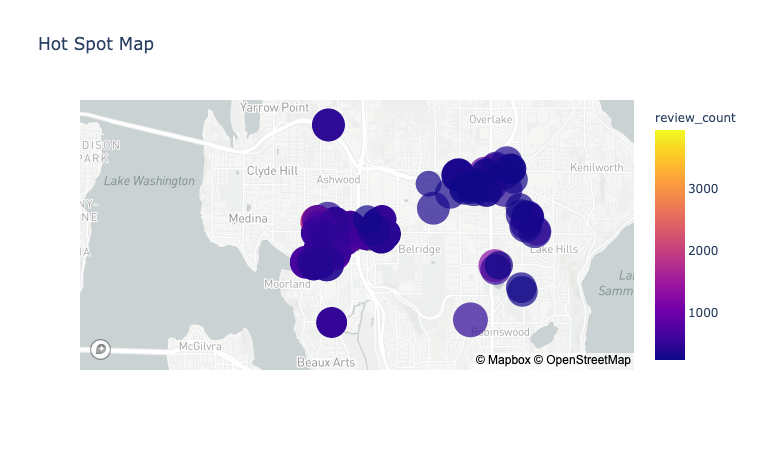

In [132]:
# Create a scatter mapbox to analyze business info
map_plot = px.scatter_mapbox(
    business_df,
    title = "Hot Spot Map",
    lat = "lat",
    lon = "lon",
    size = "rating",
    color = "review_count",
    size_max = 25,
    zoom = 11
)

#display the map

map_plot.show()

In [145]:
business_df.hvplot(kind='scatter',x='name', width=600, height=450, rot= 90, y='review_count')

:Scatter   [name]   (review_count)

In [141]:
#station one scatter plot

from pathlib import Path
station_one_df = pd.read_csv(Path("group_4/004.01-proj-group4/M8_Challenge_Submission/Data/Tesla_Superchargers/station_one.csv"))
#tesla head
station_one_df.head()

,Unnamed: 0,name,price,review_count,location.zip_code
0,0,Din Tai Fung,$$,3945,98004
1,1,Facing East,$$,1893,98004
2,2,John Howie Steak Restaurant,$$$$,1350,98004
3,3,Maggiano's Little Italy,$$,1154,98004
4,4,Mediterranean Kitchen,$$,1029,98004


In [143]:
#df plot to showcase average $ price on yelp on Bellevue
station_one_df.hvplot(kind='scatter', x='name', width=600, height=450, rot= 90, y='price')

:Scatter   [name]   (price)